In [1]:
import whisper
import pandas as pd

In [1]:
model = whisper.load_model("base")

# Replace /path/to/your/podcast/file.mp3 with the path to
# the podcast file you want to transcribe.
result = model.transcribe("/content/onlymp3.to - input.mp3")
article = result["text"]

# Write the transcripts to a file
with open("transcripts.txt", "w") as f:
    f.write(result["text"])
    f.write("\n")
f.close()

In [2]:
import pandas as pd
import numpy as np
import keras
import tensorflow
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

In [5]:
url = "https://raw.githubusercontent.com/ataislucky/Data-Science/main/dataset/emotion_train.txt"
data = pd.read_csv(url, sep=';')
data.columns = ["Text", "Emotions"]
data.head()

,Text,Emotions
0,i can go from feeling so hopeless to so damned...,sadness
1,im grabbing a minute to post i feel greedy wrong,anger
2,i am ever feeling nostalgic about the fireplac...,love
3,i am feeling grouchy,anger
4,ive been feeling a little burdened lately wasn...,sadness


In [7]:
texts = data["Text"].tolist()
labels = data["Emotions"].tolist()

In [8]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

In [9]:
sequences = tokenizer.texts_to_sequences(texts)
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length)

In [10]:
# Encode the string labels to integers
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [11]:
one_hot_labels = keras.utils.to_categorical(labels)

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(padded_sequences, 
                                                one_hot_labels, 
                                                test_size=0.2)

In [13]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, 
                    output_dim=128, input_length=max_length))
model.add(Flatten())
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=len(one_hot_labels[0]), activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(xtrain, ytrain, epochs=10, batch_size=32, validation_data=(xtest, ytest))

Epoch 1/10
400/400 [==============================] - 15s 35ms/step - loss: 1.3513 - accuracy: 0.4739 - val_loss: 0.8585 - val_accuracy: 0.6916
Epoch 2/10
400/400 [==============================] - 13s 34ms/step - loss: 0.3465 - accuracy: 0.8871 - val_loss: 0.5018 - val_accuracy: 0.8309
Epoch 3/10
400/400 [==============================] - 14s 34ms/step - loss: 0.0611 - accuracy: 0.9848 - val_loss: 0.5210 - val_accuracy: 0.8319
Epoch 4/10
400/400 [==============================] - 14s 35ms/step - loss: 0.0262 - accuracy: 0.9948 - val_loss: 0.5555 - val_accuracy: 0.8341
Epoch 5/10
400/400 [==============================] - 14s 34ms/step - loss: 0.0198 - accuracy: 0.9960 - val_loss: 0.5949 - val_accuracy: 0.8322
Epoch 6/10
400/400 [==============================] - 13s 33ms/step - loss: 0.0144 - accuracy: 0.9970 - val_loss: 0.6070 - val_accuracy: 0.8291
Epoch 7/10
400/400 [==============================] - 13s 34ms/step - loss: 0.0132 - accuracy: 0.9972 - val_loss: 0.6623 - val_accuracy:

In [14]:
file_path = 'transcripts(2).txt'

# Read the entire content of the text file with explicit encoding
with open(file_path, 'r', encoding='utf-8') as file:
    text_content = file.read()

In [15]:
def get_predicted_emotion(text):
    # Preprocess the input text
    input_sequence = tokenizer.texts_to_sequences(text)
    padded_input_sequence = pad_sequences(input_sequence, maxlen=max_length)
    prediction = model.predict(padded_input_sequence)
    predicted_label = label_encoder.inverse_transform([np.argmax(prediction[0])])
    return predicted_label

In [16]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
from textblob import TextBlob

nltk.download('punkt')

def analyze_sentiment(sentence):
    analysis = TextBlob(sentence)
    # Classify the sentiment as positive, negative, or neutral
    if analysis.sentiment.polarity > 0:
        return "positive"
    elif analysis.sentiment.polarity < 0:
        return "negative"
    else:
        return "neutral"

def get_predicted_emotion(text):

    # Preprocess the input text
    input_sequence = tokenizer.texts_to_sequences(text)
    padded_input_sequence = pad_sequences(input_sequence, maxlen=max_length)
    prediction = model.predict(padded_input_sequence)
    predicted_label = label_encoder.inverse_transform([np.argmax(prediction[0])])
    return predicted_label

def generate_summary_and_sentiment(text):
    # Tokenize the text into sentences
    sentences = sent_tokenize(text)

    # Calculate sentiment for each sentence
    sentiments = [analyze_sentiment(sentence) for sentence in sentences]

    emotions = [get_predicted_emotion(sentence) for sentence in sentences]

    # Create a DataFrame to store the results
    df = pd.DataFrame({'Sentence': sentences, 'Sentiment': sentiments, 'Emotions': emotions})

    return df

result_df = generate_summary_and_sentiment(text_content)

# Print the DataFrame
print(result_df)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anude\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


3/3 [==============================] - 0s 2ms/step
                                               Sentence Sentiment Emotions
0                     I'm going to go to the next room.   neutral    [joy]
1                     I'm going to go to the next room.   neutral    [joy]
2                     I'm going to go to the next room.   neutral    [joy]
3                     I'm going to go to the next room.   neutral    [joy]
4                     I'm going to go to the next room.   neutral    [joy]
...                                                 ...       ...      ...
1202                                  Quickly, quickly.  positive   [fear]
1203                                           Quickly.  positive   [fear]
1204  The End My dear dear kitty, you're my friend, ...   neutral    [joy]
1205  May you live in peace and help to make this a ...  positive    [joy]
1206  The End The End The End The End The End The En...   neutral    [joy]

[1207 rows x 3 columns]


In [19]:
result_df.head()

,Sentence,Sentiment,Emotions
0,I'm going to go to the next room.,neutral,[joy]
1,I'm going to go to the next room.,neutral,[joy]
2,I'm going to go to the next room.,neutral,[joy]
3,I'm going to go to the next room.,neutral,[joy]
4,I'm going to go to the next room.,neutral,[joy]


In [20]:

# Shift the 'Sentence' column to get the sentence from one row above
result_df['Sentence_Above'] = result_df['Sentence'].shift(-1)

# Shift the 'Sentence' column to get the sentence from one row below
result_df['Sentence_Below'] = result_df['Sentence'].shift(1)

# Combine the sentences from the current row, the row above, and the row below
result_df['Combined_Sentences'] = result_df.apply(lambda row: f"{row['Sentence_Below']} {row['Sentence']} {row['Sentence_Above']}" 
                                     if not pd.isnull(row['Sentence_Below']) and not pd.isnull(row['Sentence_Above'])
                                     else row['Sentence'], axis=1)

# Drop the intermediate columns used for shifting
result_df = result_df.drop(['Sentence_Above', 'Sentence_Below'], axis=1)

In [21]:
result_df['Combined_Sentiment'] = result_df['Combined_Sentences'].apply(analyze_sentiment)
result_df['Combined_Emotion'] = result_df['Combined_Sentences'].apply(get_predicted_emotion)

3/3 [==============================] - 0s 1ms/step


In [22]:
result_df

,Sentence,Sentiment,Emotions,Combined_Sentences,Combined_Sentiment,Combined_Emotion
0,I'm going to go to the next room.,neutral,[joy],I'm going to go to the next room.,neutral,[joy]
1,I'm going to go to the next room.,neutral,[joy],I'm going to go to the next room. I'm going t...,neutral,[joy]
2,I'm going to go to the next room.,neutral,[joy],I'm going to go to the next room. I'm going to...,neutral,[joy]
3,I'm going to go to the next room.,neutral,[joy],I'm going to go to the next room. I'm going to...,neutral,[joy]
4,I'm going to go to the next room.,neutral,[joy],I'm going to go to the next room. I'm going to...,neutral,[joy]
...,...,...,...,...,...,...
1202,"Quickly, quickly.",positive,[fear],"QU code Get inside. Quickly, quickly. Quickly.",positive,[fear]
1203,Quickly.,positive,[fear],"Quickly, quickly. Quickly. The End My dear dea...",positive,[fear]
1204,"The End My dear dear kitty, you're my friend, ...",neutral,[joy],"Quickly. The End My dear dear kitty, you're my...",positive,[fear]
1205,May you live in peace and help to make this a ...,positive,[joy],"The End My dear dear kitty, you're my friend, ...",positive,[joy]


In [23]:
temp_final_df = result_df


In [57]:
result_df

,Sentence,Sentiment,Emotions,Combined_Sentences,Combined_Sentiment,Combined_Emotion
0,I'm going to go to the next room.,neutral,[sadness],I'm going to go to the next room.,neutral,[sadness]
1,I'm going to go to the next room.,neutral,[sadness],I'm going to go to the next room. I'm going t...,neutral,[sadness]
2,I'm going to go to the next room.,neutral,[sadness],I'm going to go to the next room. I'm going to...,neutral,[sadness]
3,I'm going to go to the next room.,neutral,[sadness],I'm going to go to the next room. I'm going to...,neutral,[sadness]
4,I'm going to go to the next room.,neutral,[sadness],I'm going to go to the next room. I'm going to...,neutral,[sadness]
...,...,...,...,...,...,...
1202,"Quickly, quickly.",positive,[fear],"QU code Get inside. Quickly, quickly. Quickly.",positive,[fear]
1203,Quickly.,positive,[fear],"Quickly, quickly. Quickly. The End My dear dea...",positive,[fear]
1204,"The End My dear dear kitty, you're my friend, ...",neutral,[fear],"Quickly. The End My dear dear kitty, you're my...",positive,[fear]
1205,May you live in peace and help to make this a ...,positive,[sadness],"The End My dear dear kitty, you're my friend, ...",positive,[fear]


In [24]:
final_df = temp_final_df
final_df['Emotions'] = final_df['Emotions'].apply(lambda emotions: ', '.join(emotions))
final_df['Combined_Emotion'] = final_df['Combined_Emotion'].apply(lambda emotions: ', '.join(emotions))

In [25]:
final_df.tail()

,Sentence,Sentiment,Emotions,Combined_Sentences,Combined_Sentiment,Combined_Emotion
1202,"Quickly, quickly.",positive,fear,"QU code Get inside. Quickly, quickly. Quickly.",positive,fear
1203,Quickly.,positive,fear,"Quickly, quickly. Quickly. The End My dear dea...",positive,fear
1204,"The End My dear dear kitty, you're my friend, ...",neutral,joy,"Quickly. The End My dear dear kitty, you're my...",positive,fear
1205,May you live in peace and help to make this a ...,positive,joy,"The End My dear dear kitty, you're my friend, ...",positive,joy
1206,The End The End The End The End The End The En...,neutral,joy,The End The End The End The End The End The En...,neutral,joy


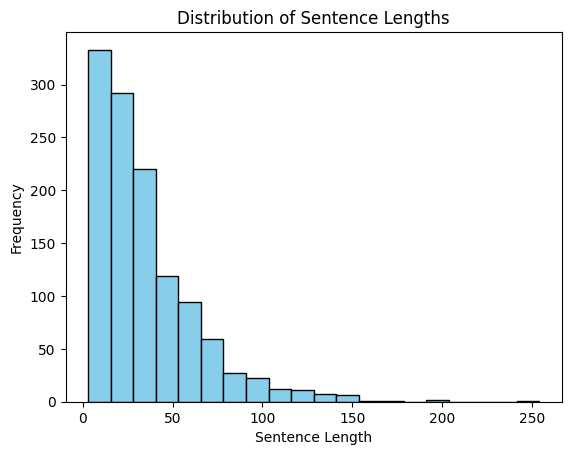

In [26]:
import matplotlib.pyplot as plt

# Assuming final_df is your DataFrame and 'Sentence' is a valid column
final_df['Sentence Length'] = final_df['Sentence'].apply(len)

# Plot a histogram of sentence lengths
plt.hist(final_df['Sentence Length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

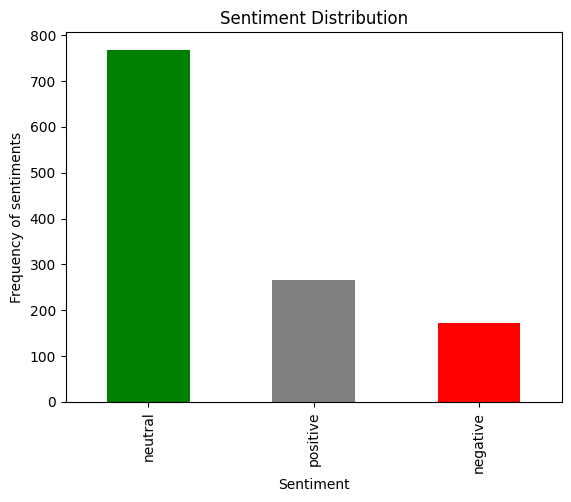

In [30]:


# Count the number of occurrences of each sentiment
sentiment_counts = final_df['Sentiment'].value_counts()

# Plot a bar chart
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency of sentiments')
plt.show()

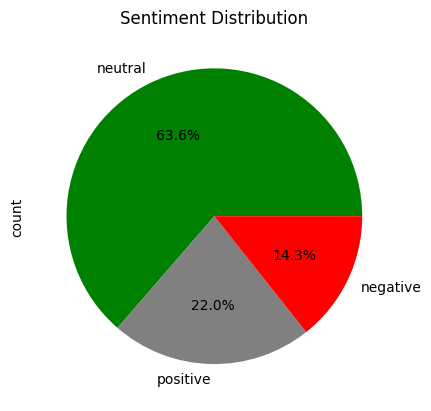

In [31]:
# Plot a pie chart
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'gray', 'red'])
plt.title('Sentiment Distribution')
plt.show()

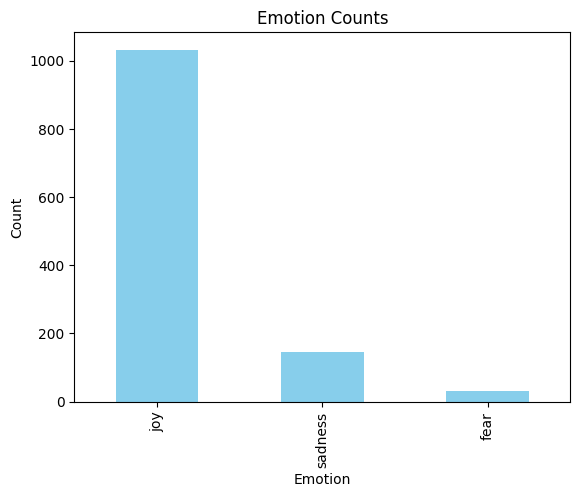

In [32]:
# Assuming final_df is your DataFrame and 'Emotions' is a valid column
emotion_counts = final_df['Emotions'].value_counts()

# Plot a bar chart of emotion counts
emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Emotion Counts')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

In [33]:
emotion_counts = final_df['Emotions'].value_counts()

In [34]:
emotion_counts

Emotions
joy        1032
sadness     145
fear         30
Name: count, dtype: int64

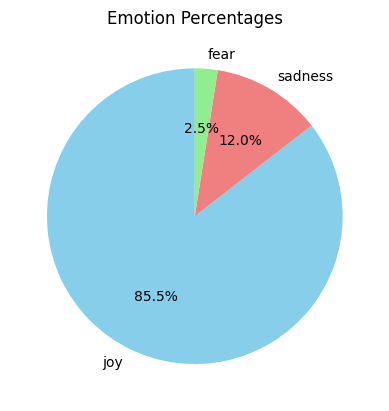

In [35]:
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Emotion Percentages')
plt.show()

In [36]:
# Assuming final_df is your DataFrame and 'Emotions' is a valid column
unique_emotions = final_df['Emotions'].unique()

# Display the unique types of emotions
print("Unique Emotions:", unique_emotions)

Unique Emotions: ['joy' 'sadness' 'fear']


In [37]:
# Get unique emotions
unique_emotions = data['Emotions'].unique()

# Display the unique emotions
print("Unique Emotions:", unique_emotions)

Unique Emotions: ['sadness' 'anger' 'love' 'surprise' 'fear' 'joy']


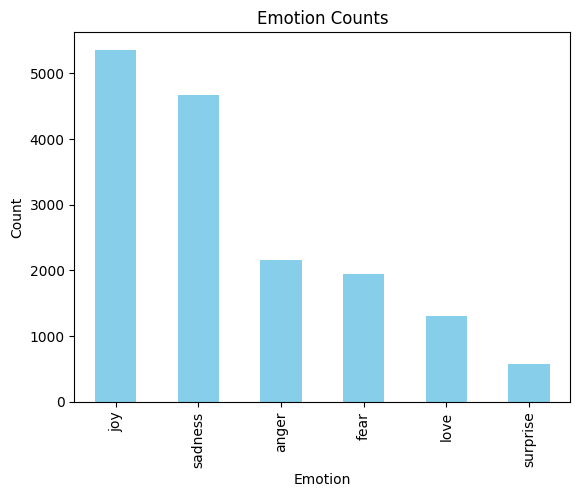

In [38]:
# Get the counts of each unique emotion
emotion_counts = data['Emotions'].value_counts()

# Plot a bar chart of emotion counts
emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Emotion Counts')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

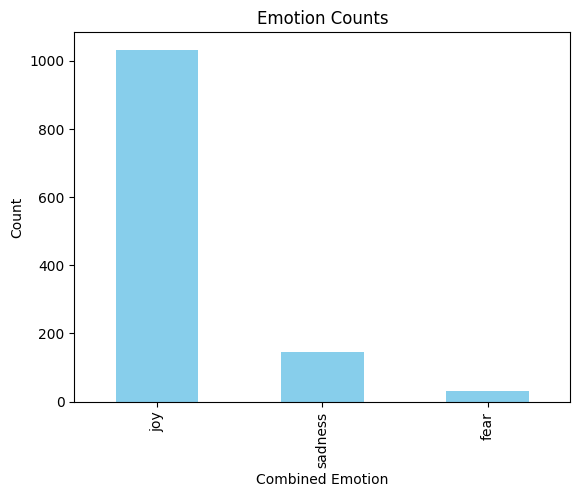

In [39]:
# Assuming final_df is your DataFrame and 'Emotions' is a valid column
combined_emotion_counts = final_df['Combined_Emotion'].value_counts()

# Plot a bar chart of emotion counts
combined_emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Emotion Counts')
plt.xlabel('Combined Emotion')
plt.ylabel('Count')
plt.show()

In [40]:
combined_emotion_counts = final_df['Combined_Emotion'].value_counts()
combined_emotion_counts

Combined_Emotion
joy        1032
sadness     145
fear         30
Name: count, dtype: int64

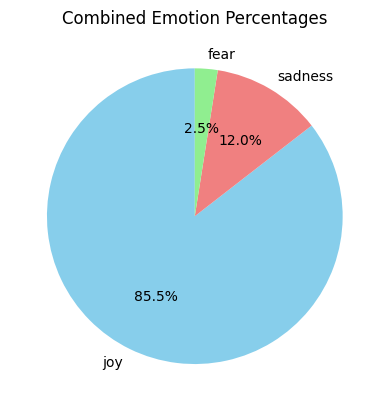

In [41]:
plt.pie(combined_emotion_counts, labels=combined_emotion_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Combined Emotion Percentages')
plt.show()

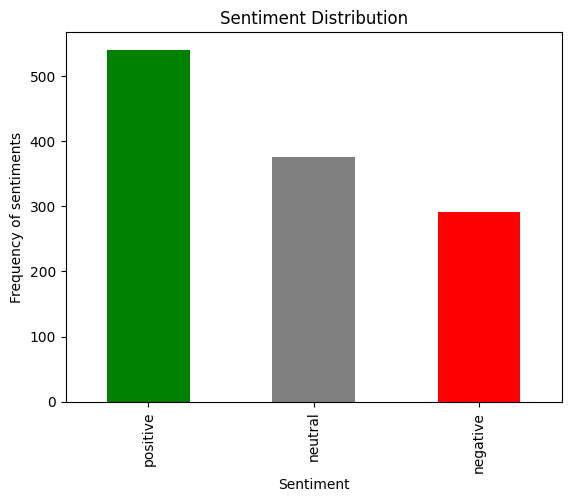

In [42]:
# Count the number of occurrences of each sentiment
combined_sentiment_counts = final_df['Combined_Sentiment'].value_counts()

# Plot a bar chart
combined_sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency of sentiments')
plt.show()

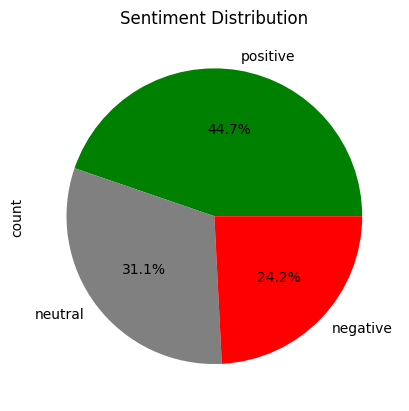

In [75]:
# Plot a pie chart
combined_sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'gray', 'red'])
plt.title('Sentiment Distribution')
plt.show()

In [79]:
result_df

,Sentence,Sentiment,Emotions,Combined_Sentences,Combined_Sentiment,Combined_Emotion,Sentence Length,Emotion_Difference,Emotions_Set
0,I'm going to go to the next room.,neutral,sadness,I'm going to go to the next room.,neutral,sadness,34,1,{sadness}
1,I'm going to go to the next room.,neutral,sadness,I'm going to go to the next room. I'm going t...,neutral,sadness,33,1,{sadness}
2,I'm going to go to the next room.,neutral,sadness,I'm going to go to the next room. I'm going to...,neutral,sadness,33,1,{sadness}
3,I'm going to go to the next room.,neutral,sadness,I'm going to go to the next room. I'm going to...,neutral,sadness,33,1,{sadness}
4,I'm going to go to the next room.,neutral,sadness,I'm going to go to the next room. I'm going to...,neutral,sadness,33,1,{sadness}
...,...,...,...,...,...,...,...,...,...
1202,"Quickly, quickly.",positive,fear,"QU code Get inside. Quickly, quickly. Quickly.",positive,fear,17,1,{fear}
1203,Quickly.,positive,fear,"Quickly, quickly. Quickly. The End My dear dea...",positive,fear,8,1,{fear}
1204,"The End My dear dear kitty, you're my friend, ...",neutral,fear,"Quickly. The End My dear dear kitty, you're my...",positive,fear,201,1,{fear}
1205,May you live in peace and help to make this a ...,positive,sadness,"The End My dear dear kitty, you're my friend, ...",positive,fear,76,1,{sadness}


In [28]:
sum_diff = 0
for index, row in result_df.iterrows():
    if row['Emotions'] != row['Combined_Emotion']:
        sum_diff += 1

In [29]:
print("Number of differring emotions of single sentence compared to combined sentencesare: ", sum_diff)

Number of differring emotions of single sentence compared to combined sentencesare:  273


In [101]:
# Initialize a DataFrame to store the differing rows
diff_rows_df = result_df[result_df['Emotions'] != result_df['Combined_Emotion']]

# Display the DataFrame with differing rows
diff_rows_df

,Sentence,Sentiment,Emotions,Combined_Sentences,Combined_Sentiment,Combined_Emotion,Sentence Length,Emotion_Difference,Emotions_Set
45,The morning.,neutral,fear,It's already 6 in the morning. The morning. Sh...,neutral,sadness,12,1,{fear}
46,"She arguments, doesn't she?",neutral,sadness,"The morning. She arguments, doesn't she? Does ...",negative,fear,27,1,{sadness}
51,"Hurry, hurry, run!",neutral,joy,"No duh How frick is that? Hurry, hurry, run! G...",positive,sadness,18,1,{joy}
52,Get out of the Lasbago!,neutral,sadness,"Hurry, hurry, run! Get out of the Lasbago! Hur...",neutral,joy,23,1,{sadness}
53,"Hurry, what are you waiting for?",neutral,joy,"Get out of the Lasbago! Hurry, what are you wa...",neutral,sadness,32,1,{joy}
...,...,...,...,...,...,...,...,...,...
1187,"Don't, house.",neutral,sadness,They may be armed and then search the whole pl...,positive,fear,13,1,{sadness}
1191,Your valuables.,neutral,fear,Bring me all your valuables first. Your valuab...,positive,sadness,15,1,{fear}
1194,"Goodbye, Kitty.",neutral,sadness,"You're right. Goodbye, Kitty. I won't forget you.",positive,fear,15,1,{sadness}
1201,QU code Get inside.,neutral,fear,"It's auely ahead. QU code Get inside. Quickly,...",positive,sadness,19,1,{fear}


In [43]:
sum_diff_sentiment = 0
for index, row in result_df.iterrows():
    if row['Sentiment'] != row['Combined_Sentiment']:
        sum_diff_sentiment += 1

In [44]:
print("Number of differring sentiments of single sentence compared to combined sentencesare: ", sum_diff_sentiment)

Number of differring sentiments of single sentence compared to combined sentencesare:  455


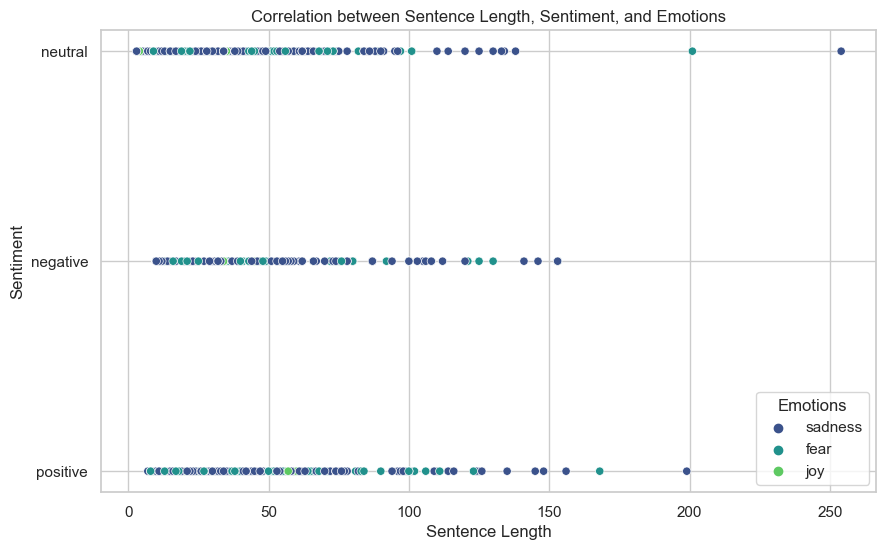

In [119]:
# Calculate sentence lengths
final_df['Sentence Length'] = final_df['Sentence'].apply(len)

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sentence Length', y='Sentiment', hue='Emotions', data=final_df, palette='viridis')
plt.title('Correlation between Sentence Length, Sentiment, and Emotions')
plt.xlabel('Sentence Length')
plt.ylabel('Sentiment')
plt.legend(title='Emotions')
plt.show()

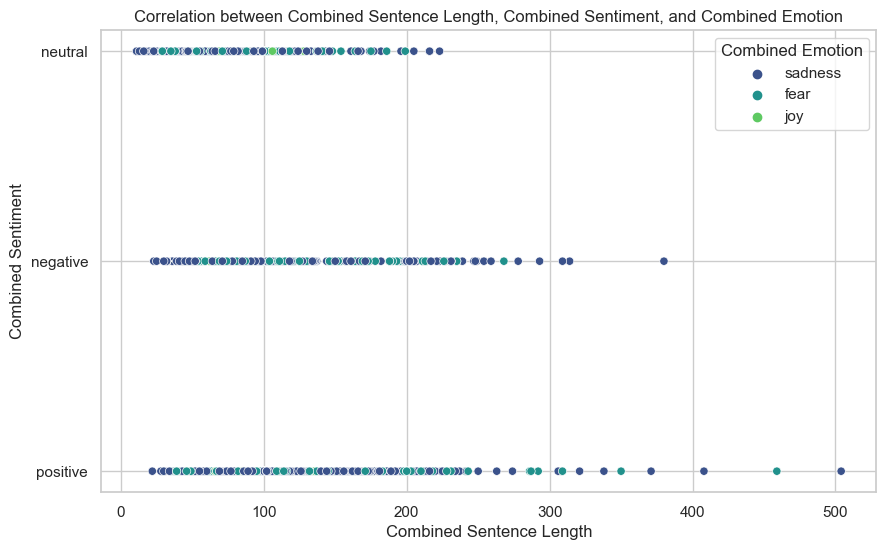

In [118]:
# Calculate combined sentence lengths
result_df['Combined_Sentence Length'] = result_df['Combined_Sentences'].apply(len)

# Create a scatter plot for combined sentence length
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Combined_Sentence Length', y='Combined_Sentiment', hue='Combined_Emotion', data=result_df, palette='viridis')
plt.title('Correlation between Combined Sentence Length, Combined Sentiment, and Combined Emotion')
plt.xlabel('Combined Sentence Length')
plt.ylabel('Combined Sentiment')
plt.legend(title='Combined Emotion')
plt.show()

In [120]:
# Calculate sentence lengths
final_df['Sentence Length'] = final_df['Sentence'].apply(len)

# Label encode 'Sentiment' and 'Emotions'
le = LabelEncoder()
final_df['Sentiment Code'] = le.fit_transform(final_df['Sentiment'])
final_df['Emotions Code'] = le.fit_transform(final_df['Emotions'])

# Perform correlation analysis
correlation_matrix = final_df[['Sentence Length', 'Sentiment Code', 'Emotions Code']].corr()

# Display the correlation matrix
print(correlation_matrix)

                 Sentence Length  Sentiment Code  Emotions Code
Sentence Length         1.000000        0.113507      -0.007926
Sentiment Code          0.113507        1.000000      -0.077893
Emotions Code          -0.007926       -0.077893       1.000000


In [125]:
final_df

,Sentence,Sentiment,Emotions,Combined_Sentences,Combined_Sentiment,Combined_Emotion,Sentence Length,Emotion_Difference,Emotions_Set,Sentiment Code,Emotions Code,Combined Sentence Length,Combined_Sentence Length
0,I'm going to go to the next room.,neutral,sadness,I'm going to go to the next room.,neutral,sadness,34,1,{sadness},1,2,7,34
1,I'm going to go to the next room.,neutral,sadness,I'm going to go to the next room. I'm going t...,neutral,sadness,33,1,{sadness},1,2,7,102
2,I'm going to go to the next room.,neutral,sadness,I'm going to go to the next room. I'm going to...,neutral,sadness,33,1,{sadness},1,2,7,101
3,I'm going to go to the next room.,neutral,sadness,I'm going to go to the next room. I'm going to...,neutral,sadness,33,1,{sadness},1,2,7,101
4,I'm going to go to the next room.,neutral,sadness,I'm going to go to the next room. I'm going to...,neutral,sadness,33,1,{sadness},1,2,7,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,"Quickly, quickly.",positive,fear,"QU code Get inside. Quickly, quickly. Quickly.",positive,fear,17,1,{fear},2,0,8,46
1203,Quickly.,positive,fear,"Quickly, quickly. Quickly. The End My dear dea...",positive,fear,8,1,{fear},2,0,8,228
1204,"The End My dear dear kitty, you're my friend, ...",neutral,fear,"Quickly. The End My dear dear kitty, you're my...",positive,fear,201,1,{fear},1,0,8,287
1205,May you live in peace and help to make this a ...,positive,sadness,"The End My dear dear kitty, you're my friend, ...",positive,fear,76,1,{sadness},2,2,8,350


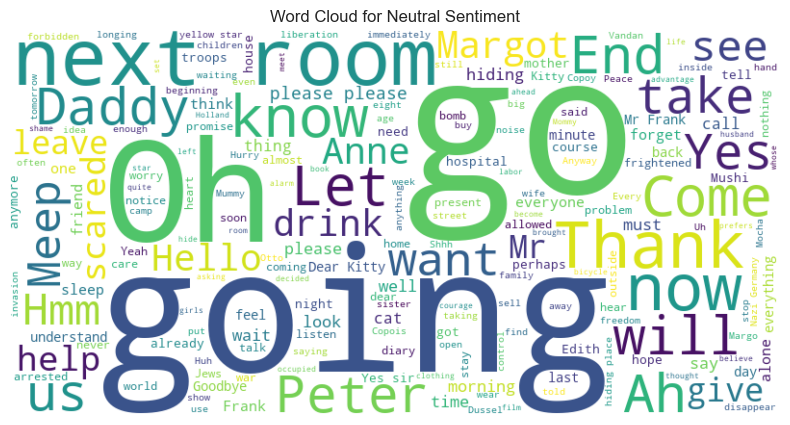

In [104]:

from wordcloud import WordCloud
# Filter data for neutral sentiment
neutral_data = final_df[final_df['Sentiment'] == 'neutral']

# Concatenate all text in the 'Sentence' column for neutral sentiment
text_for_wordcloud = ' '.join(neutral_data['Sentence'].values)

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Neutral Sentiment')
plt.show()

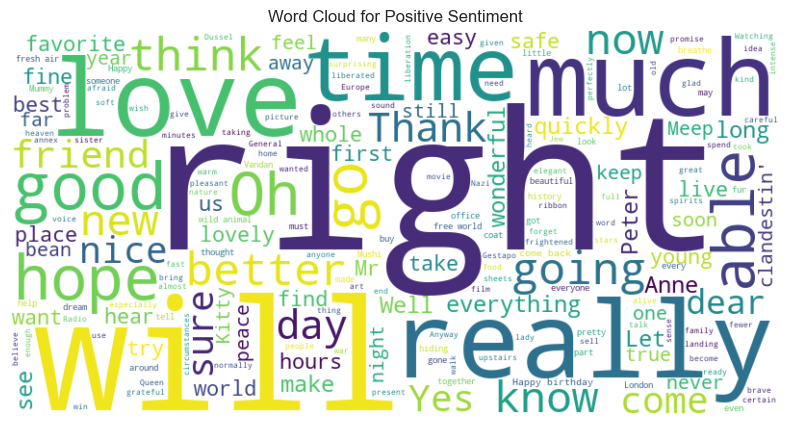

In [105]:
# Filter data for positive sentiment
neutral_data = final_df[final_df['Sentiment'] == 'positive']

# Concatenate all text in the 'Sentence' column for neutral sentiment
text_for_wordcloud = ' '.join(neutral_data['Sentence'].values)

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment')
plt.show()

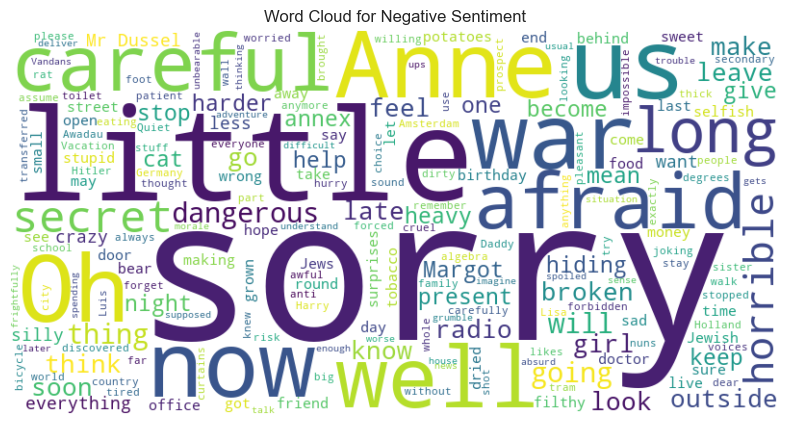

In [106]:
# Filter data for negative sentiment
neutral_data = final_df[final_df['Sentiment'] == 'negative']

# Concatenate all text in the 'Sentence' column for neutral sentiment
text_for_wordcloud = ' '.join(neutral_data['Sentence'].values)

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiment')
plt.show()

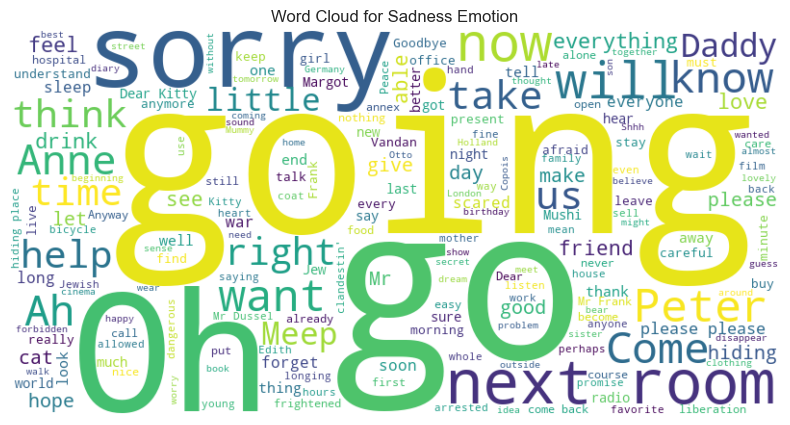

In [107]:
# Filter data for 'sadness' emotion
joy_data = final_df[final_df['Emotions'] == 'sadness']

# Concatenate all text in the 'Sentence' column for 'joy' emotion
text_for_wordcloud = ' '.join(joy_data['Sentence'].values)

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Sadness Emotion')
plt.show()

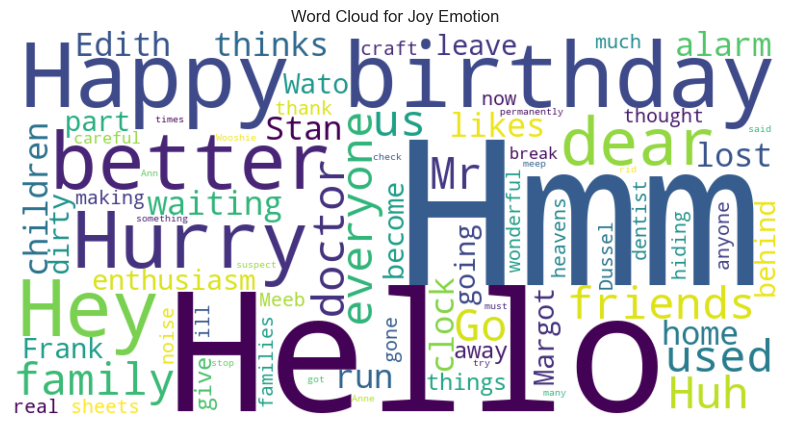

In [108]:
# Filter data for 'joy' emotion
joy_data = final_df[final_df['Emotions'] == 'joy']

# Concatenate all text in the 'Sentence' column for 'joy' emotion
text_for_wordcloud = ' '.join(joy_data['Sentence'].values)

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Joy Emotion')
plt.show()

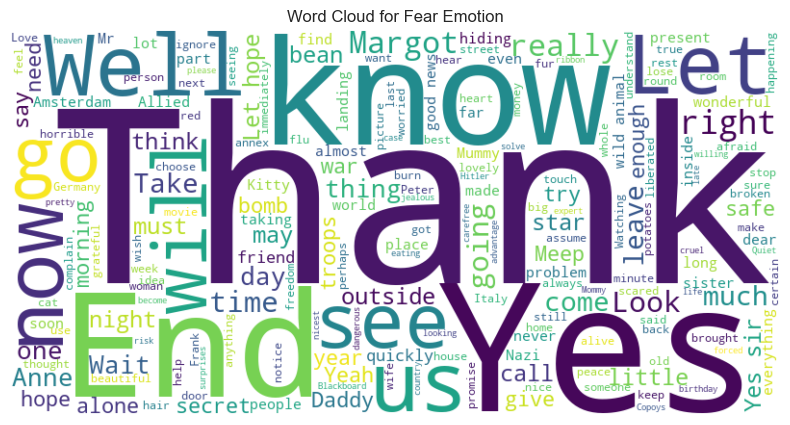

In [109]:
# Filter data for 'joy' emotion
joy_data = final_df[final_df['Emotions'] == 'fear']

# Concatenate all text in the 'Sentence' column for 'joy' emotion
text_for_wordcloud = ' '.join(joy_data['Sentence'].values)

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Fear Emotion')
plt.show()

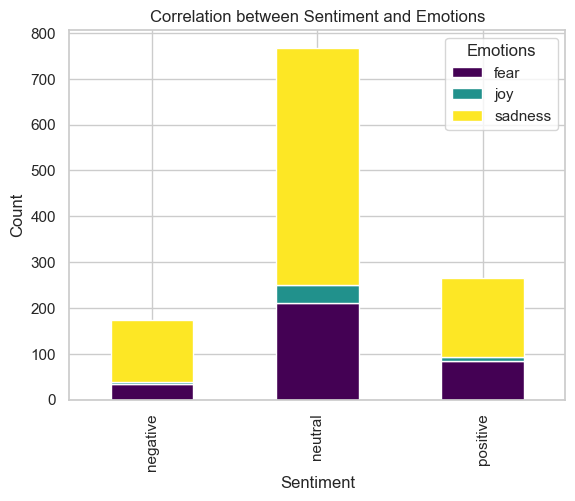

In [110]:
import seaborn as sns

# Assuming 'Sentiment' and 'Emotions' are columns in final_df

# Create a contingency table
contingency_table = pd.crosstab(final_df['Sentiment'], final_df['Emotions'])

# Plot a stacked bar chart
contingency_table.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Correlation between Sentiment and Emotions')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

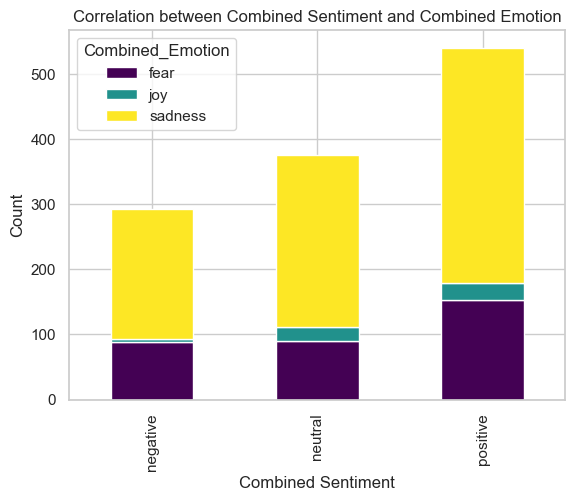

In [126]:
combined_contingency_table = pd.crosstab(final_df['Combined_Sentiment'], result_df['Combined_Emotion'])

# Plot a stacked bar chart for combined
combined_contingency_table.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Correlation between Combined Sentiment and Combined Emotion')
plt.xlabel('Combined Sentiment')
plt.ylabel('Count')
plt.show()

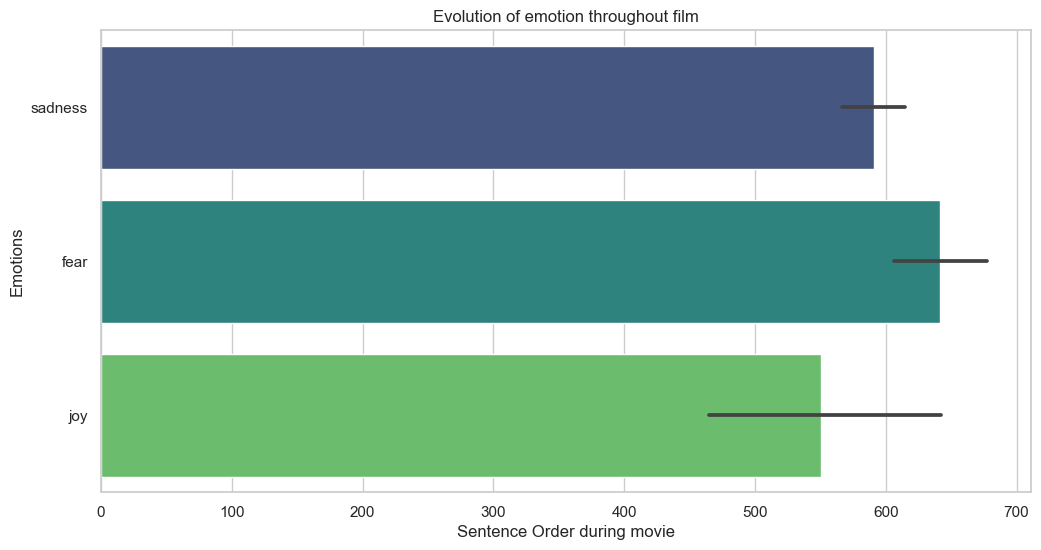

In [130]:
plt.figure(figsize=(12, 6))
sns.barplot(x=final_df.index, y='Emotions', data=final_df, palette='viridis')
plt.title('Evolution of emotion throughout film')
plt.xlabel('Sentence Order during movie')
plt.ylabel('Emotions')
plt.show()

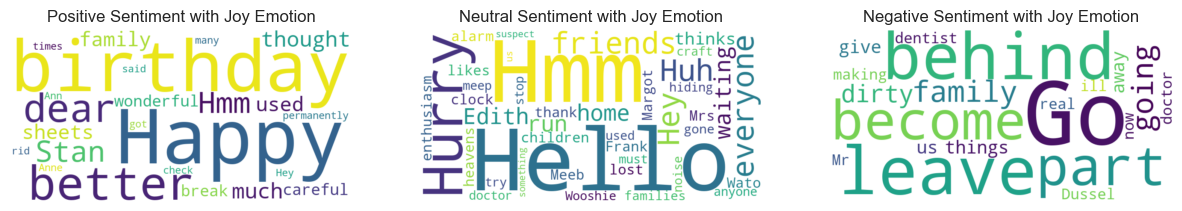

In [111]:
# Filter data for 'joy' emotion and 'positive' sentiment
joy_positive_data = final_df[(final_df['Emotions'] == 'joy') & (final_df['Sentiment'] == 'positive')]
text_positive = ' '.join(joy_positive_data['Sentence'].values)

# Filter data for 'joy' emotion and 'neutral' sentiment
joy_neutral_data = final_df[(final_df['Emotions'] == 'joy') & (final_df['Sentiment'] == 'neutral')]
text_neutral = ' '.join(joy_neutral_data['Sentence'].values)

# Filter data for 'joy' emotion and 'negative' sentiment
joy_negative_data = final_df[(final_df['Emotions'] == 'joy') & (final_df['Sentiment'] == 'negative')]
text_negative = ' '.join(joy_negative_data['Sentence'].values)

# Generate WordClouds
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(text_positive)
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(text_neutral)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(text_negative)

# Plot the WordCloud images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment with Joy Emotion')

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral Sentiment with Joy Emotion')

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment with Joy Emotion')

plt.show()


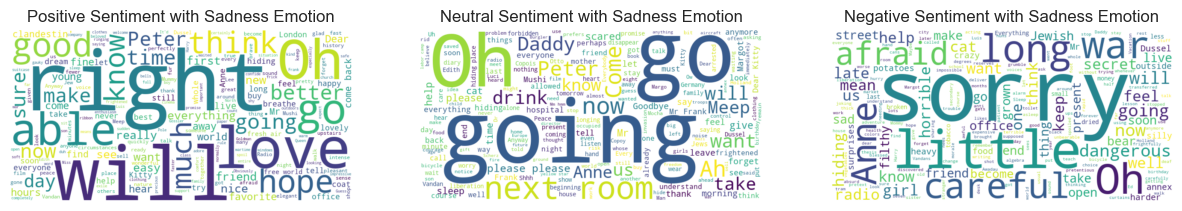

In [112]:
# Filter data for 'sadness' emotion and 'positive' sentiment
sadness_positive_data = final_df[(final_df['Emotions'] == 'sadness') & (final_df['Sentiment'] == 'positive')]
text_positive = ' '.join(sadness_positive_data['Sentence'].values)

# Filter data for 'sadness' emotion and 'neutral' sentiment
sadness_neutral_data = final_df[(final_df['Emotions'] == 'sadness') & (final_df['Sentiment'] == 'neutral')]
text_neutral = ' '.join(sadness_neutral_data['Sentence'].values)

# Filter data for 'sadness' emotion and 'negative' sentiment
sadness_negative_data = final_df[(final_df['Emotions'] == 'sadness') & (final_df['Sentiment'] == 'negative')]
text_negative = ' '.join(sadness_negative_data['Sentence'].values)

# Generate WordClouds
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(text_positive)
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(text_neutral)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(text_negative)

# Plot the WordCloud images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment with Sadness Emotion')

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral Sentiment with Sadness Emotion')

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment with Sadness Emotion')

plt.show()

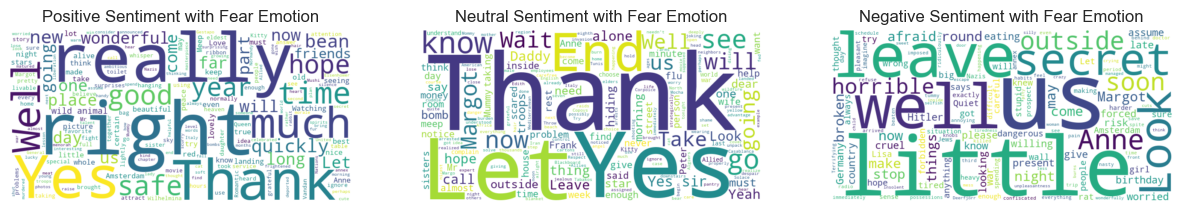

In [113]:
# Filter data for 'fear' emotion and 'positive' sentiment
fear_positive_data = final_df[(final_df['Emotions'] == 'fear') & (final_df['Sentiment'] == 'positive')]
text_positive_fear = ' '.join(fear_positive_data['Sentence'].values)

# Filter data for 'fear' emotion and 'neutral' sentiment
fear_neutral_data = final_df[(final_df['Emotions'] == 'fear') & (final_df['Sentiment'] == 'neutral')]
text_neutral_fear = ' '.join(fear_neutral_data['Sentence'].values)

# Filter data for 'fear' emotion and 'negative' sentiment
fear_negative_data = final_df[(final_df['Emotions'] == 'fear') & (final_df['Sentiment'] == 'negative')]
text_negative_fear = ' '.join(fear_negative_data['Sentence'].values)

# Generate WordClouds for fear
wordcloud_positive_fear = WordCloud(width=800, height=400, background_color='white').generate(text_positive_fear)
wordcloud_neutral_fear = WordCloud(width=800, height=400, background_color='white').generate(text_neutral_fear)
wordcloud_negative_fear = WordCloud(width=800, height=400, background_color='white').generate(text_negative_fear)

# Plot the WordCloud images for fear
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(wordcloud_positive_fear, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment with Fear Emotion')

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_neutral_fear, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral Sentiment with Fear Emotion')

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_negative_fear, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment with Fear Emotion')

plt.show()